In [2]:
import numpy as np

In [5]:
x = np.linspace(-2,1,400)
y = np.linspace(-1.5,1.5,400)
X, Y = np.meshgrid(x,y)
X,Y,X.shape,Y.shape


(array([[-2.        , -1.9924812 , -1.98496241, ...,  0.98496241,
          0.9924812 ,  1.        ],
        [-2.        , -1.9924812 , -1.98496241, ...,  0.98496241,
          0.9924812 ,  1.        ],
        [-2.        , -1.9924812 , -1.98496241, ...,  0.98496241,
          0.9924812 ,  1.        ],
        ...,
        [-2.        , -1.9924812 , -1.98496241, ...,  0.98496241,
          0.9924812 ,  1.        ],
        [-2.        , -1.9924812 , -1.98496241, ...,  0.98496241,
          0.9924812 ,  1.        ],
        [-2.        , -1.9924812 , -1.98496241, ...,  0.98496241,
          0.9924812 ,  1.        ]], shape=(400, 400)),
 array([[-1.5       , -1.5       , -1.5       , ..., -1.5       ,
         -1.5       , -1.5       ],
        [-1.4924812 , -1.4924812 , -1.4924812 , ..., -1.4924812 ,
         -1.4924812 , -1.4924812 ],
        [-1.48496241, -1.48496241, -1.48496241, ..., -1.48496241,
         -1.48496241, -1.48496241],
        ...,
        [ 1.48496241,  1.48496241,  

In [6]:
# 1. Grid zaten hazır: X, Y

# 2. Karmaşık düzlemdeki koordinatlar
C = X + 1j * Y
print("C.shape:", C.shape, "— dtype:", C.dtype)

# 3. Başlangıç için Z (hepsi sıfır)
Z = np.zeros_like(C)
print("Z.shape:", Z.shape, "— dtype:", Z.dtype)

# 4. Kaçma iterasyonlarını tutacak dizi (0’dan başlamak için int)
iters = np.zeros(C.shape, dtype=int)
print("iters.shape:", iters.shape, "— dtype:", iters.dtype)


C.shape: (400, 400) — dtype: complex128
Z.shape: (400, 400) — dtype: complex128
iters.shape: (400, 400) — dtype: int64


In [7]:
max_iter = 100

# 1. Kaçmamış noktalar için mask
mask = np.full(C.shape, True, dtype=bool)

# 2. İterasyon döngüsü
for k in range(max_iter):
    # Sadece hâlâ mask’te True olanlar için hesap
    Z[mask] = Z[mask]**2 + C[mask]
    
    # Şu anda kaçanlar
    escaped = np.abs(Z) > 2
    
    # Yeni kaçış olanlar
    newly = escaped & mask
    
    # İterasyon sayısını kaydet
    iters[newly] = k
    
    # Kaçmışları mask’ten çıkar
    mask &= ~escaped

# Kontrol amaçlı birkaç veri:
print("Kaç nokta hâlâ mask’te (kaçmamış):", np.sum(mask))
print("İterasyon matrisinden küçük bir kesit:\n", iters[:5, :5])

Kaç nokta hâlâ mask’te (kaçmamış): 27366
İterasyon matrisinden küçük bir kesit:
 [[0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]


In [8]:
# M: 0 ise içerde kalan (∞ çeken), iters değeriyse kaçan nokta
M = np.where(mask, 0, iters)
print("M.shape:", M.shape, "— dtype:", M.dtype)
print("M matrisinden küçük bir kesit:\n", M[:5, :5])


M.shape: (400, 400) — dtype: int64
M matrisinden küçük bir kesit:
 [[0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]


In [9]:
# M[..., None] ile (400,400,1) şekline getir, sonra 3 kanala kopyala
RGB = np.broadcast_to(M[..., None], (400, 400, 3))
print("RGB.shape:", RGB.shape)


RGB.shape: (400, 400, 3)


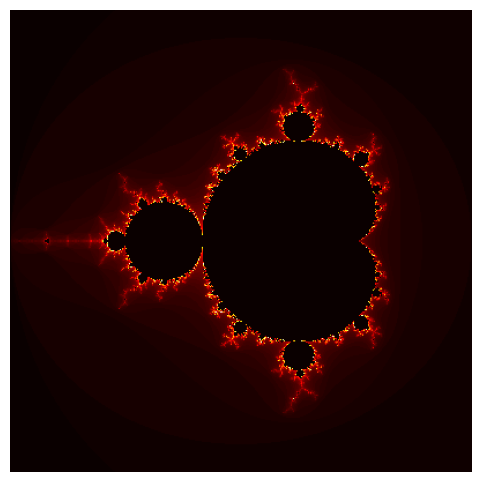

In [11]:
import matplotlib.pyplot as plt

# 5. Aşama: Görselleştirme
plt.figure(figsize=(6, 6))
plt.imshow(M, extent=(-2, 1, -1.5, 1.5), cmap='hot')
plt.axis('off')
plt.show()


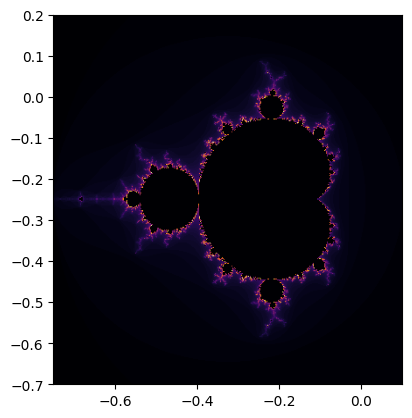

In [14]:
plt.imshow(M, extent=(-0.75,0.1,-0.7,0.2), cmap='inferno')


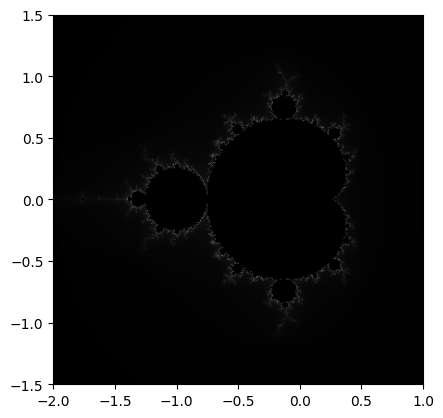

In [13]:
plt.imshow(RGB, extent=(-2,1,-1.5,1.5))
